In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
dfN4 = pd.read_csv("GBS_N4_data.csv")
dfN7 = pd.read_csv("GBS_N7_data.csv")
res_sums = np.load("res_sums.npy")
# with open("GBS_N4_covs.json", "r") as file:
#     N4_covs = json.load(file)
# with open("GBS_N7_covs.json", "r") as file:
#     N7_covs = json.load(file)

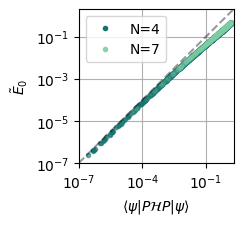

In [3]:
fig, ax = plt.subplots(figsize=(2,2))
ax.plot(dfN4['E_trues'],dfN4["E_GSs"],c="#14746f",marker='.',ls='None',alpha=0.6,label='N=4')
ax.plot(dfN7['E_trues'],dfN7["E_GSs"],c="#88d4ab",marker='.',ls="None",alpha=0.1,label='N=7')
leg = ax.legend()
for lh in leg.get_lines(): 
    lh.set_alpha(1)
ax.plot([1e-7,2],[1e-7,2],c='k',ls='--',alpha=0.4)
ax.set_xlim(1e-7,2)
ax.set_ylim(1e-7,2)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r"$\langle \psi |P\mathcal{H}P|\psi \rangle$")
ax.set_ylabel(r"$\tilde{E}_0$")
ax.grid()

In [4]:
def binx(x,y,Nx,log=True):
    if log:
        bine = np.linspace(np.log10(np.min(np.abs(x))),np.log10(np.max(x)),Nx+1)
        binc = 10**((bine[1:]+bine[:-1])/2)
        bine = 10**bine
    else:
        bine = np.linspace(np.min(x),np.max(x),Nx+1)
        binc = (bine[1:]+bine[:-1])/2
    
    out = np.zeros((Nx,3))
    for n in range(Nx):
        try:
            out[n] = np.quantile(y.loc[(x<=bine[n+1])*(x>bine[n])],[0.5-0.341,0.5,0.5+0.341])
        except:
            out[n] = (np.nan,)*3
    return binc, out

Text(0.5, 1.0, '$N=7$, $D=8$ and $\\chi=16$')

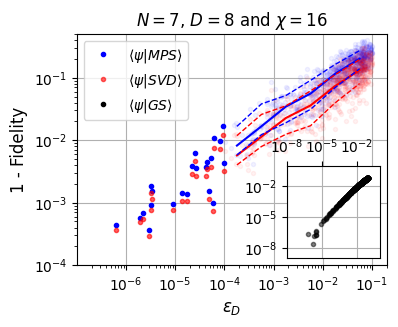

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

c4 = "blue"
alpha4 = 0.05

c7 =  "red"
alpha7 = 0.05

fig, ax = plt.subplots(figsize=(4,3))
ax.grid()


ax.plot(1-dfN7.SW_trues,np.abs(1-dfN7.F_dmrgtrues),marker=".",c=c4,alpha=alpha4,ls="none")
ax.plot(1-dfN7.SW_trues,np.abs(1-dfN7.F_MPStrues),marker=".",c=c7,alpha=alpha7,ls="none")

mask = 1-dfN7.SW_trues>1e-4
tmp_x, tmp_y = binx(1-dfN7.SW_trues[mask],np.abs(1-dfN7.F_dmrgtrues[mask]),6)
ax.plot(tmp_x,tmp_y[:,1],color="b")
ax.plot(tmp_x,tmp_y[:,[0,2]],color="b",ls='--',lw=1,zorder=100)

tmp_x, tmp_y = binx(1-dfN7.SW_trues[mask],np.abs(1-dfN7.F_MPStrues[mask]),6)
ax.plot(tmp_x,tmp_y[:,1],color="r")
ax.plot(tmp_x,tmp_y[:,[0,2]],color="r",ls='--',lw=1)

ax.plot(1-dfN7.SW_trues[~mask],np.abs(1-dfN7.F_dmrgtrues[~mask]),marker=".",c=c4,alpha=1,ls="none",label=r"$\langle \psi|MPS\rangle$")
ax.plot(1-dfN7.SW_trues[~mask],np.abs(1-dfN7.F_MPStrues[~mask]),marker=".",c=c7,alpha=0.6,ls="none",label=r"$\langle \psi|SVD\rangle$")
ax.plot(10,10,marker=".",c="k",alpha=1,ls="none",label=r"$\langle \psi|GS\rangle$")

ax.set_xlim(1e-7,2e-1)
ax.set_ylim(1e-4,5e-1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

ax.set_xticks([1e-6, 1e-5 ,1e-4,1e-3, 1e-2,1e-1])

# Create inset axes
inset_ax = inset_axes(ax, width="30%", height="40%", loc="lower right")
inset_ax.grid()

# Plot data on inset axes
inset_ax.plot(1-dfN7.SW_trues,np.abs(1-dfN7.F_GStrues),marker=".",c="k",alpha=0.5,ls="none",label=r"$\langle \psi|GS\rangle$")

inset_ax.set_xlim(1e-7,1)
inset_ax.set_ylim(1e-9,1)

inset_ax.set_xscale("log")
inset_ax.set_yscale("log")

# Move the x-axis ticks and label to the top
inset_ax.xaxis.tick_top()
inset_ax.xaxis.set_label_position('top')
inset_ax.set_xticks([1e-8,1e-5, 1e-2])
inset_ax.set_yticks([1e-8,1e-5, 1e-2])

ax.set_xlabel(r"$\varepsilon_D$", fontsize=12)
ax.set_ylabel("1 - Fidelity", fontsize=12)
ax.set_title(r"$N=7$, $D=8$ and $\chi=16$", fontsize=12)

Text(0.5, 1.0, '$N=7$, $D=8$ and $\\chi=16$')

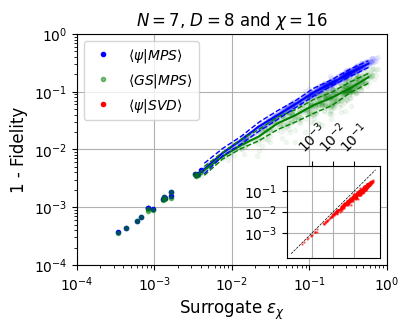

In [6]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

c4 = "blue"
alpha4 = 0.05

c7 =  "green"
alpha7 = 0.05

fig, ax = plt.subplots(figsize=(4,3))
ax.grid()
Xes = 6 - res_sums

ax.plot(Xes,np.abs(1-dfN7.F_dmrgtrues),marker=".",c=c4,alpha=alpha4,ls="none")
ax.plot(Xes,np.abs(1-dfN7.F_dmrgGSs),marker=".",c=c7,alpha=alpha7,ls="none")

mask = Xes>2e-3
tmp_x, tmp_y = binx(Xes[mask],np.abs(1-dfN7.F_dmrgtrues[mask]),10)
ax.plot(tmp_x,tmp_y[:,1],color="b")
ax.plot(tmp_x,tmp_y[:,[0,2]],color="b",ls='--',lw=1,zorder=100)

tmp_x, tmp_y = binx(Xes[mask],np.abs(1-dfN7.F_dmrgGSs[mask]),10)
ax.plot(tmp_x,tmp_y[:,1],color="g")
ax.plot(tmp_x,tmp_y[:,[0,2]],color="g",ls='--',lw=1)

mask = Xes>4e-3
ax.plot(Xes[~mask],np.abs(1-dfN7.F_dmrgtrues[~mask]),marker=".",c=c4,alpha=1,ls="none",label=r"$\langle \psi|MPS\rangle$")
ax.plot(Xes[~mask],np.abs(1-dfN7.F_dmrgGSs[~mask]),marker=".",c=c7,alpha=0.5,ls="none",label=r"$\langle GS|MPS\rangle$")
ax.plot(10,10,marker=".",c="r",alpha=1,ls="none",label=r"$\langle \psi|SVD\rangle$")

ax.set_xlim(1e-4,1)
ax.set_ylim(1e-4,1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

# Create inset axes
inset_ax = inset_axes(ax, width="30%", height="40%", loc="lower right")
inset_ax.grid()

# Plot data on inset axes
inset_ax.plot(Xes,np.abs(1-dfN7.F_MPStrues),marker=".",c="r",alpha=0.5,ls="none",label=r"$\langle \psi|SVD\rangle$",markersize=1.5)
inset_ax.plot([1e-4,1],[1e-4,1],'k--',lw=0.5)

inset_ax.set_xscale("log")
inset_ax.set_yscale("log")

# Move the x-axis ticks and label to the top
inset_ax.xaxis.tick_top()
inset_ax.xaxis.set_label_position('top')
inset_ax.set_xticks([1e-3,1e-2, 1e-1])
inset_ax.set_xticklabels([r"$10^{-3}$",r"$10^{-2}$",r"$10^{-1}$"], rotation=45)
inset_ax.set_yticks([1e-3,1e-2, 1e-1])
inset_ax.set_yticklabels([r"$10^{-3}$",r"$10^{-2}$",r"$10^{-1}$"])

ax.set_xlabel(r"Surrogate $\varepsilon_\chi$", fontsize=12)
ax.set_ylabel("1 - Fidelity", fontsize=12)
ax.set_title(r"$N=7$, $D=8$ and $\chi=16$", fontsize=12)

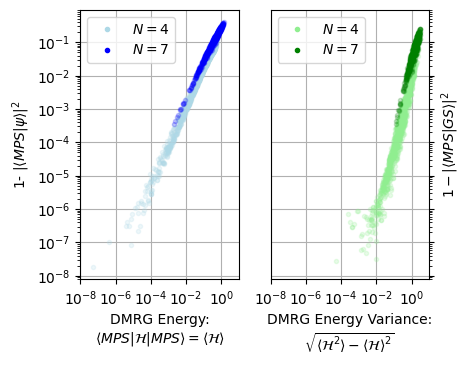

In [7]:
fig, ax = plt.subplots(figsize=(4.5,3.5),ncols=2,sharex=True,sharey=True)
ax[0].plot(dfN4.E_dmrgs,1-dfN4.F_dmrgtrues,c="lightblue",marker='.',ls='None',alpha=0.2,label=r"$N=4$")
ax[0].plot(dfN7.E_dmrgs,1-dfN7.F_dmrgtrues,c="blue",marker='.',ls="None",alpha=0.2,label=r"$N=7$")
leg = ax[0].legend()
for lh in leg.get_lines(): 
    lh.set_alpha(1)
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("DMRG Energy:\n"+r"$\langle MPS | \mathcal{H} | MPS \rangle=\langle\mathcal{H}\rangle$")
ax[0].grid()
ax[0].set_ylabel(r"1- $|\langle MPS|\psi\rangle|^2$")

ax[1].plot(dfN4.Evar_dmrgs,1-dfN4.F_dmrgGSs,c="lightgreen",marker='.',ls='None',alpha=0.2,label=r"$N=4$")
ax[1].plot(dfN7.Evar_dmrgs,1-dfN7.F_dmrgGSs,c="green",marker='.',ls="None",alpha=0.2,label=r"$N=7$")
leg = ax[1].legend()
for lh in leg.get_lines(): 
    lh.set_alpha(1)

ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].set_xlabel("DMRG Energy Variance:\n"+r"$\sqrt{\langle \mathcal{H}^2\rangle - \langle \mathcal{H} \rangle^2}$")
ax[1].grid()
ax[1].set_ylabel(r"$1 - |\langle MPS|GS\rangle|^2$")
ax[1].set_xlim(1e-8,10)
ax[1].set_xticks([1e-8,1e-6,1e-4,1e-2,1]);